In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [3]:
data_4.shape

(18565, 10)

In [4]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


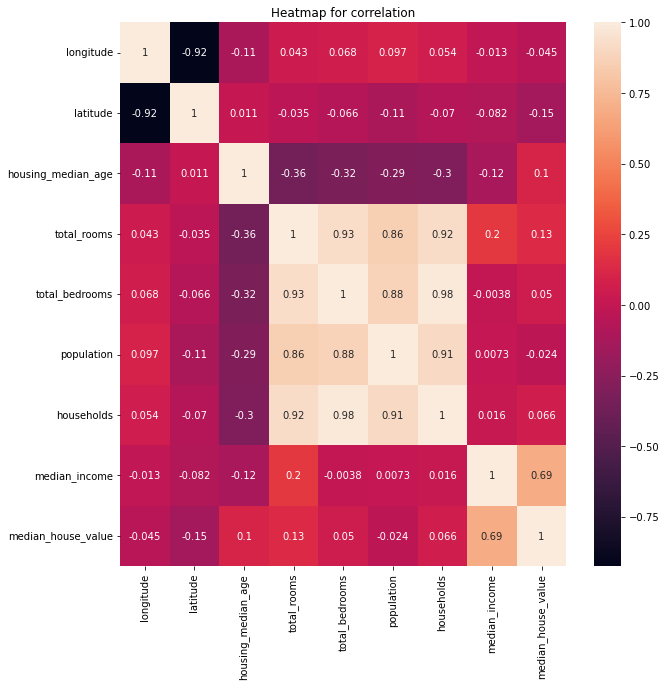

In [5]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_4.corr(),annot = True)
plt.title("Heatmap for correlation")
plt.show()

In [6]:
mean_households = data_4.loc[data_4.total_bedrooms.isnull()==False,'households'].mean()
mean_bedrooms = data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean()
print(f"Mean Households = {mean_households} and Mean total_bedrooms = {mean_bedrooms}")
print(f"Ratio of Bedrooms to Households = {mean_bedrooms/mean_households}")

Mean Households = 499.3758707009142 and Mean total_bedrooms = 537.7111993905094
Ratio of Bedrooms to Households = 1.0767664818001488


In [7]:
data_4.loc[data_4.total_bedrooms.isnull()==True,'total_bedrooms'] = round(data_4.
                                                                          loc[data_4.total_bedrooms.isnull()==True,
                                                                              'households']*mean_bedrooms/mean_households,0)

In [8]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [9]:
data_4.loc[data_4.housing_median_age == max(data_4.housing_median_age),['housing_median_age','median_house_value']]

,housing_median_age,median_house_value
2,52,342200
3,52,269700
4,52,299200
5,52,241400
7,52,261100
...,...,...
18113,52,183300
18185,52,349000
18200,52,198400
18201,52,206600


In [10]:
data_4.housing_median_age.value_counts().head()

52    1129
36     782
35     742
16     705
17     634
Name: housing_median_age, dtype: int64

In [11]:
data_4.median_house_value.value_counts().head

<bound method NDFrame.head of 500001    868
137500    112
162500    109
112500     97
187500     87
         ... 
454300      1
365300      1
262200      1
300700      1
47000       1
Name: median_house_value, Length: 3759, dtype: int64>

In [12]:
round(data_4.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18565.0,-119.57,2.00,-124.35,-121.80,-118.50,-118.01,-114.31
latitude,18565.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,18565.0,28.62,12.56,1.00,18.00,29.00,37.00,52.00
total_rooms,18565.0,2634.03,2195.92,2.00,1442.00,2123.00,3141.00,39320.00
total_bedrooms,18565.0,537.79,424.07,2.00,295.00,434.00,646.00,6445.00
population,18565.0,1426.22,1142.57,3.00,786.00,1166.00,1725.00,35682.00
households,18565.0,499.45,384.55,2.00,279.00,408.00,603.00,6082.00
median_income,18565.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,18565.0,206617.79,115447.10,14999.00,119300.00,179400.00,264400.00,500001.00


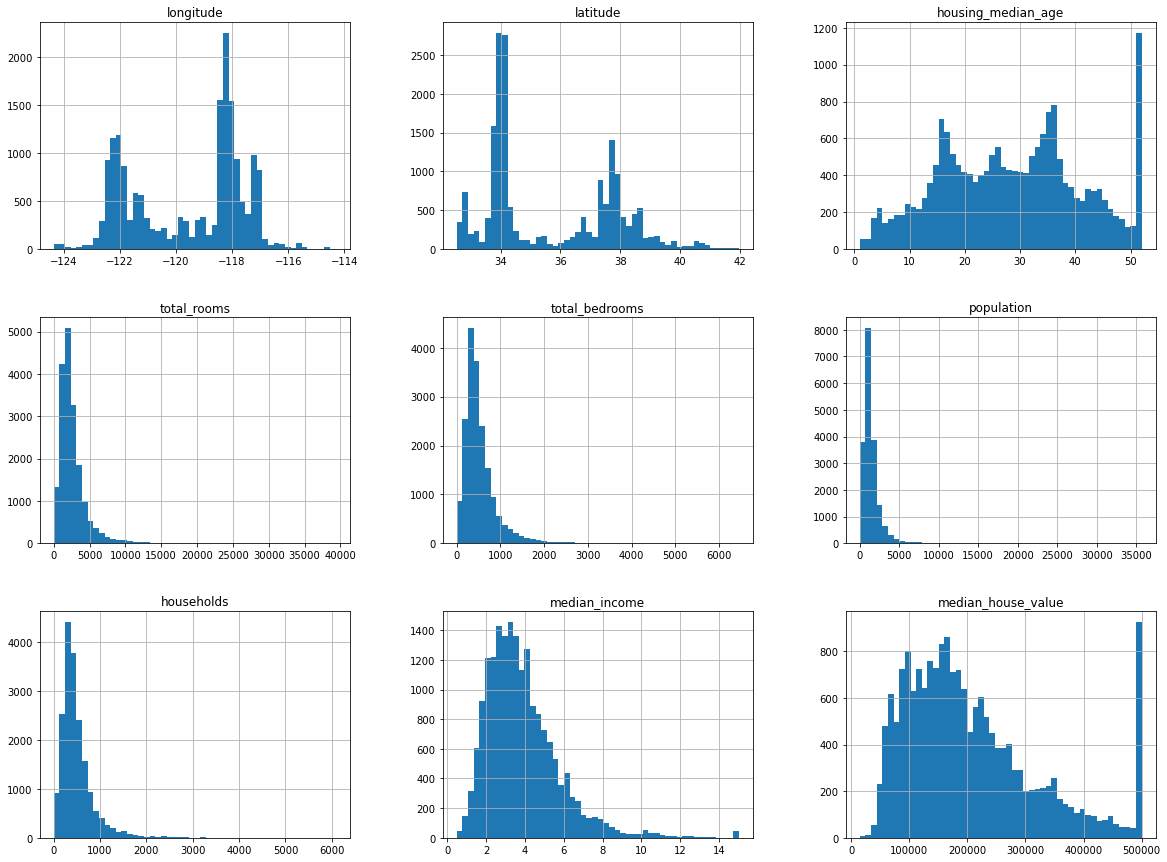

In [13]:
data_4.hist(bins=50,figsize=(20,15))
plt.show()

---------------------------------------------------------------

In [14]:
round(data_4.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18565.0,-119.57,2.00,-124.35,-121.80,-118.50,-118.01,-114.31
latitude,18565.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,18565.0,28.62,12.56,1.00,18.00,29.00,37.00,52.00
total_rooms,18565.0,2634.03,2195.92,2.00,1442.00,2123.00,3141.00,39320.00
total_bedrooms,18565.0,537.79,424.07,2.00,295.00,434.00,646.00,6445.00
population,18565.0,1426.22,1142.57,3.00,786.00,1166.00,1725.00,35682.00
households,18565.0,499.45,384.55,2.00,279.00,408.00,603.00,6082.00
median_income,18565.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,18565.0,206617.79,115447.10,14999.00,119300.00,179400.00,264400.00,500001.00


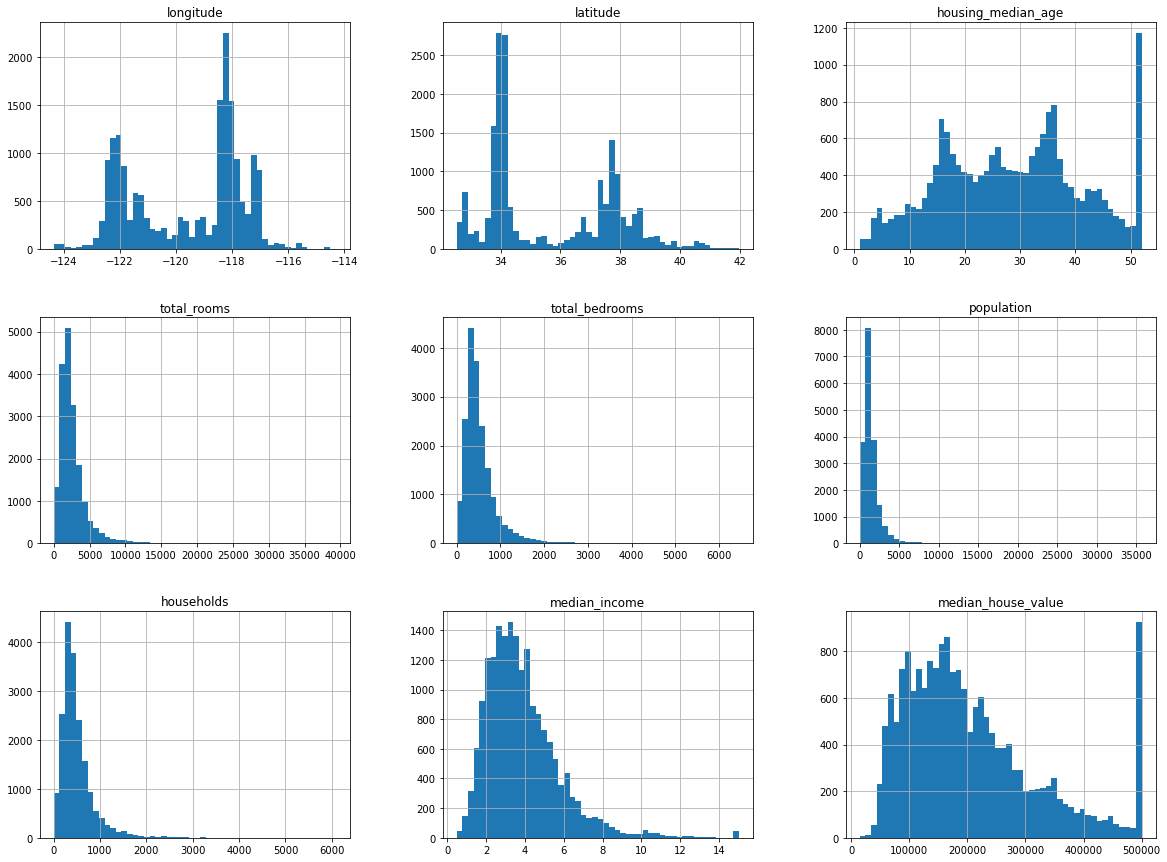

In [15]:
data_4.hist(bins=50,figsize=(20,15))
plt.show()

In [16]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


As we can see all the columns have complete columns except for total_rooms which has 18376 non-null values against the total of 18565 non-null elements. We can replace this with something else. We can take any of the following approaches:
- Replace by the average values
- Take the ratio of mean total bedrooms to mean total rooms for non null values and multiply the ratio by the number of rooms

We will be taking the second approach. 

In [17]:
mean_total_households = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'households'].mean(),0)
print(f"Average number of total households in non null columns {mean_total_households}")
mean_total_bedrooms = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean(),0)
print(f"Average number of total bed rooms in non null columns {mean_total_bedrooms}")
print(f"Ratio of the number of bedrooms to number of total rooms = {mean_total_bedrooms/mean_total_households}")

Average number of total households in non null columns 499.0
Average number of total bed rooms in non null columns 538.0
Ratio of the number of bedrooms to number of total rooms = 1.0781563126252505


Now we multiply the number of rooms in null columns of total bedrooms with 1.07815 and round it to arrive at the total number of bedrooms in the null columns.

In [18]:
data_4.loc[data_4.total_bedrooms.isnull(),'total_bedrooms'] = round(data_4.loc[data_4.total_bedrooms.isnull(),
                                                                         'total_rooms']*mean_total_bedrooms/mean_total_households,0)

In [19]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


Now we can see there is no null column in the data and all the data points are complete. Next step will be creation of dummy variables from ```ocean_proximities``` which is a categorical variables. 

In [20]:
data_4 = data_4.loc[data_4.median_house_value != max(data_4.median_house_value),:]

In [21]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17697 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   median_house_value  17697 non-null  int64  
 9   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [22]:
data_4_dummies = pd.get_dummies(data_4,
                                columns= data_4.select_dtypes('object').columns,
                               drop_first = True)

In [23]:
data_4_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17697 non-null  float64
 1   latitude                    17697 non-null  float64
 2   housing_median_age          17697 non-null  int64  
 3   total_rooms                 17697 non-null  int64  
 4   total_bedrooms              17697 non-null  float64
 5   population                  17697 non-null  int64  
 6   households                  17697 non-null  int64  
 7   median_income               17697 non-null  float64
 8   median_house_value          17697 non-null  int64  
 9   ocean_proximity_INLAND      17697 non-null  uint8  
 10  ocean_proximity_ISLAND      17697 non-null  uint8  
 11  ocean_proximity_NEAR BAY    17697 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  17697 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

In [24]:
data_4.ocean_proximity.value_counts()

<1H OCEAN     7709
INLAND        5895
NEAR OCEAN    2208
NEAR BAY      1880
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Now remember we cannot standardize the variables before train-test-split, because we will be carrying the impact of train dataset into test dataset. Therefore, we will be splitting the data into train and test before running the ```StandardScaler```

In [26]:
x_variables = data_4_dummies.loc[:,data_4_dummies.columns!='median_house_value']
y_variables = data_4_dummies.loc[:,data_4_dummies.columns == 'median_house_value']

In [27]:
print(y_variables.head())
print(x_variables.head())

   median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  ocean_proximity_INLAND  \
0         322         126         8.3252                       0   
1        2401        1138         8.3014                       0   
2         565         259         3.8462                       0   
3         413         193         4.0368                       0   
4        1094         514         3.6591                       0   

   ocean

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_variables,y_variables, test_size = 0.20, random_state = 1)

Now we standardize the columns. However, we will not be standardizing the dummy variables because their values are 0/1 already. 

In [29]:
x_scaler = StandardScaler()
x_train_scaled = x_train.copy(deep = True)

In [30]:
x_train_scaled.loc[:,
                   [col for col in x_train_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_train_scaled.loc[:,
                                   [col for col in x_train_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [31]:
x_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,14157.0,-2.225340e-15,1.000035,-2.387681,-1.096863,0.527874,0.782050,2.616108
latitude,14157.0,3.802300e-16,1.000035,-1.446501,-0.800553,-0.642551,0.965347,2.926426
housing_median_age,14157.0,-1.681686e-16,1.000035,-2.192778,-0.830361,-0.028939,0.692341,1.894474
total_rooms,14157.0,2.882408e-17,1.000035,-1.180517,-0.535682,-0.233317,0.227215,16.536900
total_bedrooms,14157.0,8.514690e-17,1.000035,-1.255110,-0.569967,-0.246039,0.255001,13.759778
population,14157.0,2.042114e-17,1.000035,-1.233388,-0.554472,-0.224859,0.256289,29.312698
households,14157.0,-5.270756e-17,1.000035,-1.284866,-0.567968,-0.239069,0.269696,14.337840
median_income,14157.0,-1.003804e-17,1.000035,-2.035058,-0.736271,-0.143225,0.579038,6.095812
ocean_proximity_INLAND,14157.0,3.340397e-01,0.471670,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,14157.0,2.119093e-04,0.014556,0.000000,0.000000,0.000000,0.000000,1.000000


In [32]:
x_test_scaled = x_test.copy(deep = True)
x_test_scaled.loc[:,
                   [col for col in x_test_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_test_scaled.loc[:,
                                   [col for col in x_test_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [33]:
x_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3540.0,-3.315364e-15,1.000141,-2.341622,-1.103965,0.513358,0.790613,2.499104
latitude,3540.0,2.189648e-15,1.000141,-1.448145,-0.800731,-0.637714,0.955202,2.930045
housing_median_age,3540.0,1.183611e-16,1.000141,-2.188676,-0.832263,-0.034372,0.683729,1.880564
total_rooms,3540.0,1.315802e-16,1.000141,-1.239126,-0.556852,-0.226487,0.225130,12.017580
total_bedrooms,3540.0,-4.210380e-17,1.000141,-1.307702,-0.580650,-0.241686,0.259391,8.949632
population,3540.0,1.982093e-17,1.000141,-1.301677,-0.585151,-0.240597,0.293142,12.433877
households,3540.0,-1.492842e-17,1.000141,-1.334660,-0.584426,-0.234046,0.278308,9.690453
median_income,3540.0,1.944458e-18,1.000141,-2.007323,-0.723343,-0.139015,0.595021,7.086919
ocean_proximity_INLAND,3540.0,3.293785e-01,0.470054,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,3540.0,5.649718e-04,0.023766,0.000000,0.000000,0.000000,0.000000,1.000000


Now we have scaled the relevant columns, we can start running the model. We also need to scale the output columns as well. 

In [34]:
y_train_scaled = y_train.copy(deep = True)
y_train_scaled.loc[:,:]= x_scaler.fit_transform(y_train_scaled)

In [35]:
y_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,14157.0,-9.583192e-18,1.000035,-1.819153,-0.776208,-0.188334,0.569415,3.174179


In [36]:
y_test_scaled = y_test.copy(deep = True)
y_test_scaled.loc[:,:] = x_scaler.fit_transform(y_test_scaled)

In [37]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,3540.0,194368.107345,100106.139616,17500.0,115950.0,173950.0,251150.0,500000.0


In [38]:
y_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,3540.0,5.181041e-17,1.000141,-1.767055,-0.78346,-0.203993,0.567297,3.05351


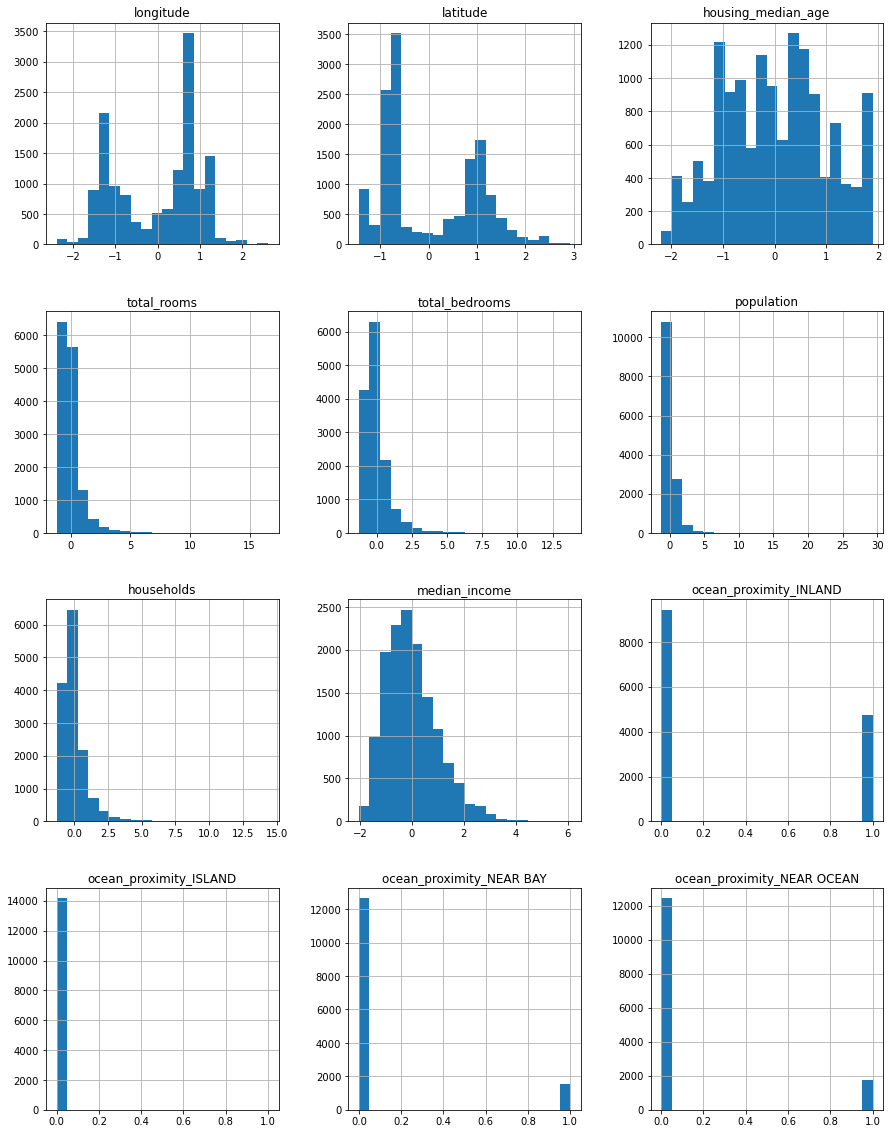

In [39]:
x_train_scaled.hist(bins = 20, figsize=(15,20))
plt.show()

In [40]:
x_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3540.0,-3.315364e-15,1.000141,-2.341622,-1.103965,0.513358,0.790613,2.499104
latitude,3540.0,2.189648e-15,1.000141,-1.448145,-0.800731,-0.637714,0.955202,2.930045
housing_median_age,3540.0,1.183611e-16,1.000141,-2.188676,-0.832263,-0.034372,0.683729,1.880564
total_rooms,3540.0,1.315802e-16,1.000141,-1.239126,-0.556852,-0.226487,0.225130,12.017580
total_bedrooms,3540.0,-4.210380e-17,1.000141,-1.307702,-0.580650,-0.241686,0.259391,8.949632
population,3540.0,1.982093e-17,1.000141,-1.301677,-0.585151,-0.240597,0.293142,12.433877
households,3540.0,-1.492842e-17,1.000141,-1.334660,-0.584426,-0.234046,0.278308,9.690453
median_income,3540.0,1.944458e-18,1.000141,-2.007323,-0.723343,-0.139015,0.595021,7.086919
ocean_proximity_INLAND,3540.0,3.293785e-01,0.470054,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,3540.0,5.649718e-04,0.023766,0.000000,0.000000,0.000000,0.000000,1.000000


In [41]:
data_4.ocean_proximity.value_counts()

<1H OCEAN     7709
INLAND        5895
NEAR OCEAN    2208
NEAR BAY      1880
ISLAND           5
Name: ocean_proximity, dtype: int64

### Building the models
<br>We will attempt running following type of models:
1. Linear Regression Model (simple regression model)
2. LASSO Regression to remove multi collinearity
3. Decision Trees including Random Forest
4. Deep Learning Model

#### Linear Regression
We will start building the linear regression model. 

In [42]:
import statsmodels.api as sm

In [43]:
x_train_scaled = sm.add_constant(x_train_scaled)
model_1 = sm.OLS(y_train_scaled,x_train_scaled).fit()

In [44]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.611     
Dependent Variable:   median_house_value   AIC:                  26824.5071
Date:                 2022-07-24 06:52     BIC:                  26922.7606
No. Observations:     14157                Log-Likelihood:       -13399.   
Df Model:             12                   F-statistic:          1854.     
Df Residuals:         14144                Prob (F-statistic):   0.00      
R-squared:            0.611                Scale:                0.38907   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                       0.1347   0.0093  14.4934 0.0000  0.1165  0.1529
longitude                  -0.4992   0.0220 -22.6528 0.0000 -0.5424 -0.4560
latitude                   -0.4919   0.0232 -21.1939 0.0000 -0.5374 -0.4464
housing_median_age          0.1209   0.0061  19.7222 0.0000  0.1089  0.1329
total_rooms                -0.1631   0.0197  -8.2786 0.0000 -0.2018 -0.1245
total_bedrooms              0.3908   0.0315  12.4049 0.0000  0.3291  0.4526
population                 -0.3396   0.0131 -25.8476 0.0000 -0.3654 -0.3139
households                  0.1635   0.0302   5.4078 0.0000  0.1042  0.2228
median_income               0.6169   0.0072  86.0000 0.0000  0.6028  0.6309
ocean_proximity_INLAND     -0.3978   0.0187 -21.2769 0.0000 -0.4344 -0.3611
ocean_proximity_ISLAND      1.7763   0.3605   4.9277 0.0000  1.0697  2.4828
ocean_proximity_NEAR BAY   -0.0666   0.0211  -3.1626 0.0016 -0.1079 -0.0253
ocean_proximity_NEAR OCEAN  0.0399   0.0175   2.2859 0.0223  0.0057  0.0741
---------------------------------------------------------------------------
Omnibus:                3055.347         Durbin-Watson:            1.979   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         9449.982
Skew:                   1.108            Prob(JB):                 0.000   
Kurtosis:               6.334            Condition No.:            136     
===========================================================================

"""

<Figure size 720x576 with 0 Axes>

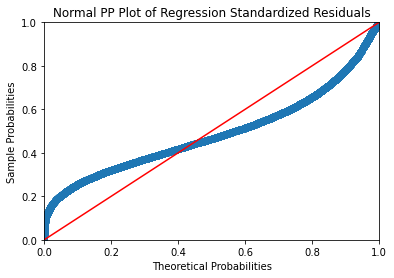

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
house_price_data_resid = model_1.resid
probplot = sm.ProbPlot(house_price_data_resid)
plt.figure(figsize = (10,8))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

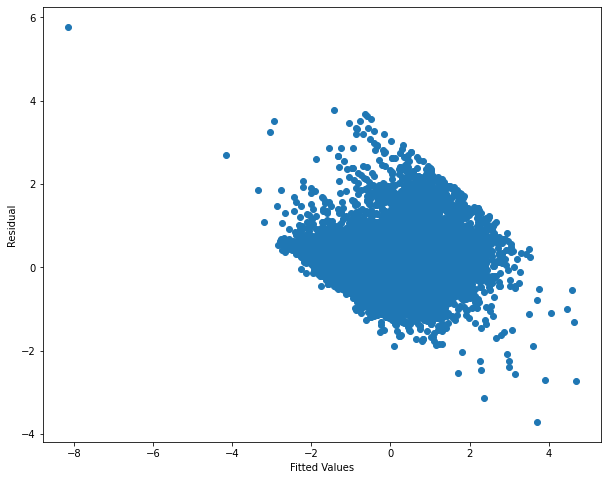

In [46]:
def standardized(vals):
    return((vals-vals.mean())/vals.std())
plt.figure(figsize = (10,8))
plt.scatter(standardized(model_1.fittedvalues),model_1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

R2 Score 0.6199277978195414


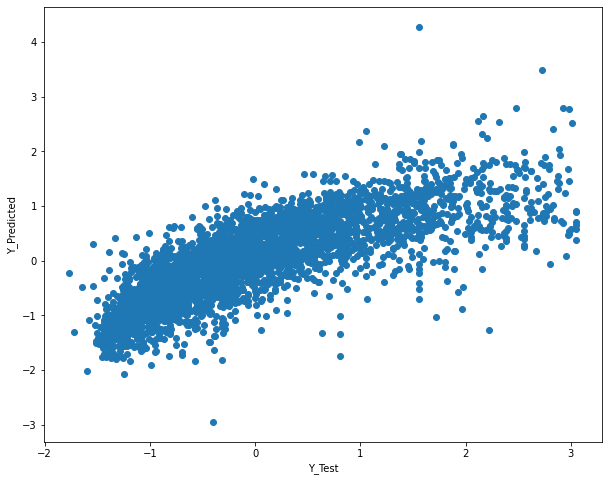

In [47]:
pred = model_1.predict(sm.add_constant(x_test_scaled))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test_scaled,pred))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

We can see at the higher value of Y_test we can see that there is the regression is not working well, for remaining portion is working fine. 

In [48]:
y_pred = model_1.predict(sm.add_constant(x_test_scaled))

In [49]:
from sklearn.metrics import r2_score,mean_squared_error

In [50]:
np.abs(r2_score(y_test_scaled,y_pred))

0.6199277978195414

In [51]:
y_predict_actual = y_pred.iloc[:]*np.std(y_test)[0] + np.mean(y_test,axis=0)[0]

In [52]:
np.sqrt(mean_squared_error(y_test,y_predict_actual))

61706.71370642188

In [53]:
y_predict_test = model_1.predict(sm.add_constant(x_train_scaled))

In [54]:
y_predict_test_actual = y_predict_test*np.std(y_train)[0] + np.mean(y_train,axis=0)[0]

In [55]:
np.sqrt(mean_squared_error(y_train,y_predict_test_actual))

60556.96400013982

In [56]:
model_1.params

const                         0.134725
longitude                    -0.499216
latitude                     -0.491897
housing_median_age            0.120870
total_rooms                  -0.163133
total_bedrooms                0.390821
population                   -0.339639
households                    0.163509
median_income                 0.616856
ocean_proximity_INLAND       -0.397752
ocean_proximity_ISLAND        1.776250
ocean_proximity_NEAR BAY     -0.066618
ocean_proximity_NEAR OCEAN    0.039896
dtype: float64

##### Resolving for Multi-collinearity using VIF Factors

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    #X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF']  = vif
    return vif_factors

In [58]:
vif_factors = get_vif_factors(x_variables)

In [59]:
vif_factors.sort_values(by = ['VIF'])

,column,VIF
9,ocean_proximity_ISLAND,1.002109
11,ocean_proximity_NEAR OCEAN,1.311530
10,ocean_proximity_NEAR BAY,1.640952
8,ocean_proximity_INLAND,2.816709
2,housing_median_age,8.364593
7,median_income,12.036250
5,population,16.394810
3,total_rooms,33.608614
6,households,90.704407
4,total_bedrooms,95.845383


-------------------

In [60]:
columns_to_select = ['ocean_proximity_ISLAND',
                     'ocean_proximity_NEAR OCEAN',
                     'ocean_proximity_NEAR BAY',
                     'housing_median_age',
                     'median_income',
                     'latitude']

x_train_scaled_2 = sm.add_constant(x_train_scaled.loc[:,columns_to_select])
print(x_train_scaled_2.head(2))
model_2 = sm.OLS(y_train_scaled, x_train_scaled_2).fit()

       const  ocean_proximity_ISLAND  ocean_proximity_NEAR OCEAN  \
14344    1.0                       0                           0   
699      1.0                       0                           0   

       ocean_proximity_NEAR BAY  housing_median_age  median_income  latitude  
14344                         1            1.894474       0.031378  0.960700  
699                           1            0.211488       0.499644  0.928171  


In [61]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.493     
Dependent Variable:   median_house_value   AIC:                  30561.7635
Date:                 2022-07-24 06:52     BIC:                  30614.6693
No. Observations:     14157                Log-Likelihood:       -15274.   
Df Model:             6                    F-statistic:          2297.     
Df Residuals:         14150                Prob (F-statistic):   0.00      
R-squared:            0.493                Scale:                0.50682   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                      -0.1017   0.0069 -14.7822 0.0000 -0.1152 -0.0882
ocean_proximity_ISLAND      2.1404   0.4112   5.2051 0.0000  1.3344  2.9464
ocean_proximity_NEAR OCEAN  0.3966   0.0185  21.3804 0.0000  0.3602  0.4330
ocean_proximity_NEAR BAY    0.4887   0.0217  22.5692 0.0000  0.4463  0.5312
housing_median_age          0.1570   0.0064  24.6345 0.0000  0.1445  0.1695
median_income               0.6555   0.0062 105.9503 0.0000  0.6434  0.6676
latitude                   -0.1296   0.0065 -19.9200 0.0000 -0.1423 -0.1168
---------------------------------------------------------------------------
Omnibus:                2385.334         Durbin-Watson:            1.991   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         5022.507
Skew:                   1.003            Prob(JB):                 0.000   
Kurtosis:               5.119            Condition No.:            76      
===========================================================================

"""

In [62]:
y_pred_2 = model_2.predict(sm.add_constant(x_test_scaled.loc[:,columns_to_select]))
np.abs(r2_score(y_test_scaled,y_pred_2))

0.5054652673209186

#### Regularized Regression Model

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter = 5000)
lasso.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

Lasso(alpha=0.01, max_iter=5000)

In [64]:
y_pred = lasso.predict(x_train_scaled.iloc[:,1:])
print(np.abs(r2_score(y_train_scaled,y_pred)))
y_pred_test = lasso.predict(x_test_scaled)
print(np.abs(r2_score(y_test_scaled,y_pred_test)))

0.602599068540705
0.607587414019097


In [65]:
lasso_coef_df = pd.DataFrame({'columns': x_train_scaled.iloc[:,1:].columns, 'coef':lasso.coef_})
lasso_coef_df

,columns,coef
0,longitude,-0.289189
1,latitude,-0.282708
2,housing_median_age,0.113457
3,total_rooms,-0.000000
4,total_bedrooms,0.209030
5,population,-0.263451
6,households,0.113581
7,median_income,0.577048
8,ocean_proximity_INLAND,-0.517183
9,ocean_proximity_ISLAND,0.000000


In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 2, max_iter = 5000)
ridge.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

Ridge(alpha=2, max_iter=5000)

In [67]:
y_pred = ridge.predict(x_train_scaled.iloc[:,1:])
print(np.abs(r2_score(y_train_scaled, y_pred)))
y_pred_test = ridge.predict(x_test_scaled)
print(np.abs(r2_score(y_test_scaled,y_pred_test)))

0.6111845059989005
0.619824624585499


In [68]:
ridge_df = pd.DataFrame({'columns': list(x_train_scaled.iloc[:,1:].columns)})
pd.Series(list(ridge.coef_[0]))
ridge_df['coef'] = ridge.coef_[0]
ridge_df

,columns,coef
0,longitude,-0.498278
1,latitude,-0.491103
2,housing_median_age,0.121034
3,total_rooms,-0.162039
4,total_bedrooms,0.389640
5,population,-0.339595
6,households,0.163563
7,median_income,0.616493
8,ocean_proximity_INLAND,-0.398388
9,ocean_proximity_ISLAND,1.065555


------------------------------------------

### K-nearest Neighbors Model

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
knn = KNeighborsRegressor(n_neighbors=4).fit(x_train_scaled.iloc[:,1:],y_train_scaled)
print(f"Value for Train Data Set {r2_score(knn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled)}")
print(f"Value for Test Data Set {r2_score(knn.predict(x_test_scaled),y_test_scaled)}")

Value for Train Data Set 0.7405138689467403
Value for Test Data Set 0.5485487069041928


In [70]:
knn.predict(x_train_scaled.iloc[:,1:])

array([[ 0.59644117],
       [ 0.20649877],
       [-1.10746554],
       ...,
       [-0.50800954],
       [-0.59191794],
       [-0.63412953]])

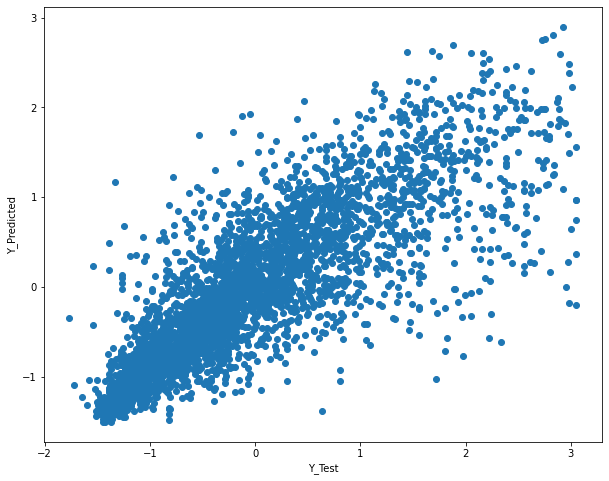

In [71]:
#print("R2 Score",r2_score(y_test,y_predict_actual))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,knn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':range(3,10),
                    'metric':['canberra','euclidean','minkowski']}]
reg = GridSearchCV(KNeighborsRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
reg.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(3, 10)}],
             scoring='r2')

In [73]:
reg.best_score_

0.6824815431505135

In [74]:
reg.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [75]:
reg.get_params()['estimator']

KNeighborsRegressor()

In [76]:
knn = KNeighborsRegressor(n_neighbors = 9,metric = 'euclidean').fit(x_train_scaled.iloc[:,1:],y_train_scaled)

In [77]:
print(f"Value for Train Data Set {r2_score(knn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled)}")
print(f"Value for Test Data Set {r2_score(knn.predict(x_test_scaled),y_test_scaled)}")

Value for Train Data Set 0.6369561026171495
Value for Test Data Set 0.5403862604298488


### Tree based models for Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 1,max_depth = 6)
reg.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [79]:
y_pred_train = reg.predict(x_train_scaled.iloc[:,1:])
print(r2_score(y_train_scaled,y_pred_train))
y_pred_test = reg.predict(x_test_scaled)
print(r2_score(y_test_scaled, y_pred_test))

0.6473114183131939
0.6146961325384339


In [80]:
tuned_parameters = [{'max_depth':range(2,30)}]
DTR = GridSearchCV(DecisionTreeRegressor(),
                  tuned_parameters,
                  cv = 10)
DTR.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(2, 30)}])

In [81]:
print(DTR.best_score_)
print(DTR.best_params_)

0.6618089792875267
{'max_depth': 9}


In [82]:
DTRF = DecisionTreeRegressor(random_state = 1, max_depth = 9)
DTRF.fit(x_train_scaled.iloc[:,1:],y_train_scaled)
y_pred_train = DTRF.predict(x_train_scaled.iloc[:,1:])
print(r2_score(y_train_scaled,y_pred_train))

y_pred_test = DTRF.predict(x_test_scaled)
print(r2_score(y_test_scaled, y_pred_test))

0.7630840513645432
0.6467800070754968


## Ensemble Models
### Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rfr = RandomForestRegressor(max_depth = 3).fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

In [85]:
print("R2 Score",round(r2_score(y_train_scaled,rfr.predict(x_train_scaled.iloc[:,1:]))))
print("R2 Score",round(r2_score(y_test_scaled,rfr.predict(x_test_scaled)),3))

R2 Score 1
R2 Score 0.539


In [86]:
tuned_parameters = {'max_depth': [2,30],
                    'n_estimators' : [10,20,30],
                    'max_features' : [1,'sqrt','log2'],
                    'bootstrap':['False','True']}
RFR = GridSearchCV(RandomForestRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
RFR.fit( x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['False', 'True'], 'max_depth': [2, 30],
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [87]:
RFR.best_params_

{'bootstrap': 'False',
 'max_depth': 30,
 'max_features': 'log2',
 'n_estimators': 30}

In [88]:
RFR.best_score_

0.7701584763957909

In [89]:
rfr1 = RandomForestRegressor(max_depth = 30, n_estimators = 30, max_features = 'log2',bootstrap = True)
rfr1.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=30)

In [90]:
train_predict = rfr1.predict(x_train_scaled.iloc[:,1:])
print(r2_score(train_predict,y_train_scaled))
test_predict = rfr1.predict(x_test_scaled)
print(r2_score(test_predict, y_test_scaled))

0.9580284472263094
0.6277152489277205


### Gradient Boosting Regressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 400,verbose = 1).fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           0.8992           10.33s
         2           0.8173            9.92s
         3           0.7500           10.03s
         4           0.6951            9.87s
         5           0.6496            9.85s
         6           0.6111            9.76s
         7           0.5796            9.74s
         8           0.5530            9.73s
         9           0.5305            9.75s
        10           0.5116            9.69s
        20           0.4132            9.27s
        30           0.3631            9.34s
        40           0.3309            9.16s
        50           0.3084            8.97s
        60           0.2954            8.70s
        70           0.2839            8.42s
        80           0.2722            8.16s
        90           0.2599            7.94s
       100           0.2504            7.70s
       200           0.2036            5.10s
       300           0.1812            2.51s
       40

In [92]:
print("R2 Score Test:",round(r2_score(y_test_scaled,gbr.predict(x_test_scaled)),3))
print("R2 Score Train:",round(r2_score(y_train_scaled, gbr.predict(x_train_scaled.iloc[:,1:])),3))

R2 Score Test: 0.774
R2 Score Train: 0.833


In [93]:
tuned_parameter = [{'n_estimators': [300,500],
                   'criterion':['friedman_mse','squared_error'],
                   'max_features':[1,'sqrt','log2'],
                   'max_depth':[2,10],
                   'verbose':[1]}]
GBR = GridSearchCV(GradientBoostingRegressor(),
                  tuned_parameter,
                  cv=10,
                  scoring = 'r2')
GBR.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           0.9553            0.89s
         2           0.9488            0.75s
         3           0.9395            0.69s
         4           0.9311            0.66s
         5           0.9261            0.65s
         6           0.8907            0.68s
         7           0.8858            0.67s
         8           0.8412            0.69s
         9           0.8386            0.71s
        10           0.8348            0.67s
        20           0.6993            0.63s
        30           0.5951            0.57s
        40           0.5150            0.56s
        50           0.4881            0.53s
        60           0.4673            0.51s
        70           0.4365            0.49s
        80           0.4215            0.46s
        90           0.3999            0.44s
       100           0.3860            0.42s
       200           0.3177            0.22s
       300           0.2904            0.00s
      Ite

       100           0.3827            0.41s
       200           0.3189            0.20s
       300           0.2905            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9867            0.30s
         2           0.9640            0.60s
         3           0.9544            0.49s
         4           0.9317            0.59s
         5           0.9234            0.59s
         6           0.9205            0.59s
         7           0.9180            0.63s
         8           0.9155            0.62s
         9           0.9055            0.65s
        10           0.8998            0.61s
        20           0.7500            0.59s
        30           0.6550            0.57s
        40           0.5885            0.53s
        50           0.5208            0.50s
        60           0.4954            0.47s
        70           0.4664            0.44s
        80           0.4336            0.43s
        90           0.4121            0.41s
       10

        90           0.3934            0.83s
       100           0.3845            0.80s
       200           0.3197            0.59s
       300           0.2924            0.39s
       400           0.2758            0.20s
       500           0.2658            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9477            1.49s
         2           0.8964            1.49s
         3           0.8924            1.32s
         4           0.8547            1.24s
         5           0.8495            1.19s
         6           0.8074            1.23s
         7           0.8036            1.26s
         8           0.7903            1.17s
         9           0.7850            1.20s
        10           0.7748            1.17s
        20           0.6951            1.01s
        30           0.6290            0.94s
        40           0.5711            0.91s
        50           0.4947            0.91s
        60           0.4695            0.88s
        7

       200           0.2806            0.44s
       300           0.2599            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9437            1.19s
         2           0.8996            1.34s
         3           0.8412            1.48s
         4           0.8017            1.55s
         5           0.7661            1.41s
         6           0.7257            1.42s
         7           0.7122            1.38s
         8           0.6931            1.35s
         9           0.6899            1.32s
        10           0.6725            1.27s
        20           0.5384            1.20s
        30           0.4523            1.19s
        40           0.4202            1.10s
        50           0.3958            1.06s
        60           0.3794            1.03s
        70           0.3643            0.98s
        80           0.3545            0.94s
        90           0.3431            0.89s
       100           0.3329            0.86s
       20

       400           0.2447            0.46s
       500           0.2326            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9528            2.49s
         2           0.9399            2.23s
         3           0.9234            2.31s
         4           0.8612            2.23s
         5           0.8484            2.27s
         6           0.8378            2.22s
         7           0.8040            2.25s
         8           0.7635            2.39s
         9           0.7292            2.45s
        10           0.7070            2.39s
        20           0.5569            2.20s
        30           0.4772            2.16s
        40           0.4238            2.11s
        50           0.3947            2.06s
        60           0.3773            2.00s
        70           0.3652            1.93s
        80           0.3519            1.88s
        90           0.3419            1.83s
       100           0.3331            1.80s
       20

        50           0.3879            1.22s
        60           0.3666            1.14s
        70           0.3554            1.07s
        80           0.3445            1.01s
        90           0.3355            0.97s
       100           0.3274            0.92s
       200           0.2809            0.46s
       300           0.2568            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9433            1.49s
         2           0.8996            1.34s
         3           0.8629            1.38s
         4           0.8069            1.25s
         5           0.7778            1.18s
         6           0.7426            1.12s
         7           0.7259            1.09s
         8           0.7094            1.13s
         9           0.6899            1.10s
        10           0.6724            1.13s
        20           0.5106            1.16s
        30           0.4512            1.15s
        40           0.4199            1.09s
        5

       200           0.2779            0.52s
       300           0.2562            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9386            1.49s
         2           0.9171            1.34s
         3           0.9056            1.28s
         4           0.8677            1.25s
         5           0.8223            1.35s
         6           0.8124            1.32s
         7           0.7786            1.29s
         8           0.7583            1.38s
         9           0.7320            1.35s
        10           0.7222            1.36s
        20           0.5529            1.28s
        30           0.4652            1.24s
        40           0.4157            1.19s
        50           0.3882            1.51s
        60           0.3675            1.41s
        70           0.3550            1.31s
        80           0.3395            1.29s
        90           0.3327            1.20s
       100           0.3227            1.20s
       20

        90           0.3392            2.10s
       100           0.3309            2.06s
       200           0.2790            1.47s
       300           0.2560            0.97s
       400           0.2424            0.48s
       500           0.2317            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9899            1.00s
         2           0.9347            1.99s
         3           0.9080            2.15s
         4           0.8942            2.23s
         5           0.8412            2.37s
         6           0.8190            2.46s
         7           0.7800            2.53s
         8           0.7485            2.45s
         9           0.7042            2.39s
        10           0.6830            2.35s
        20           0.5525            2.20s
        30           0.4716            2.17s
        40           0.4211            2.12s
        50           0.3919            2.06s
        60           0.3753            2.02s
        7

        80           0.0536            2.32s
        90           0.0477            2.20s
       100           0.0422            2.11s
       200           0.0132            1.01s
       300           0.0048            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8987            3.28s
         2           0.8054            3.27s
         3           0.7260            3.16s
         4           0.6571            3.40s
         5           0.5890            3.35s
         6           0.5359            3.37s
         7           0.4861            3.38s
         8           0.4429            3.31s
         9           0.4057            3.32s
        10           0.3782            3.30s
        20           0.2046            3.16s
        30           0.1378            2.97s
        40           0.1088            2.83s
        50           0.0868            2.66s
        60           0.0729            2.53s
        70           0.0630            2.41s
        8

       200           0.0129            2.96s
       300           0.0048            1.96s
       400           0.0018            0.98s
       500           0.0007            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8842            5.97s
         2           0.7830            5.21s
         3           0.6979            5.29s
         4           0.6280            5.19s
         5           0.5598            5.13s
         6           0.5123            5.17s
         7           0.4659            5.20s
         8           0.4229            5.15s
         9           0.3906            5.06s
        10           0.3586            5.08s
        20           0.1882            4.98s
        30           0.1324            4.77s
        40           0.1022            4.62s
        50           0.0813            4.51s
        60           0.0671            4.45s
        70           0.0557            4.32s
        80           0.0489            4.20s
        9

        20           0.1333            5.64s
        30           0.0864            5.48s
        40           0.0634            5.25s
        50           0.0487            5.11s
        60           0.0405            4.91s
        70           0.0336            4.68s
        80           0.0284            4.45s
        90           0.0240            4.23s
       100           0.0201            4.03s
       200           0.0053            1.97s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8650            6.86s
         2           0.7528            6.39s
         3           0.6544            6.32s
         4           0.5734            6.20s
         5           0.5026            6.24s
         6           0.4412            6.11s
         7           0.3914            6.01s
         8           0.3498            6.01s
         9           0.3135            6.00s
        10           0.2836            5.93s
        2

        80           0.0268            4.26s
        90           0.0232            4.07s
       100           0.0197            3.87s
       200           0.0050            1.93s
       300           0.0015            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8554            6.26s
         2           0.7394            6.54s
         3           0.6484            6.32s
         4           0.5663            6.27s
         5           0.4968            6.35s
         6           0.4362            6.30s
         7           0.3908            6.26s
         8           0.3483            6.22s
         9           0.3146            6.16s
        10           0.2833            6.10s
        20           0.1331            5.66s
        30           0.0870            5.34s
        40           0.0641            5.13s
        50           0.0518            4.89s
        60           0.0429            4.64s
        70           0.0353            4.44s
        8

        20           0.1330            9.47s
        30           0.0848            9.13s
        40           0.0621            8.93s
        50           0.0493            8.71s
        60           0.0412            8.50s
        70           0.0349            8.31s
        80           0.0293            8.09s
        90           0.0248            7.87s
       100           0.0217            7.68s
       200           0.0055            5.70s
       300           0.0017            3.82s
       400           0.0005            1.92s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8641            8.96s
         2           0.7513            8.95s
         3           0.6515            8.93s
         4           0.5714            9.15s
         5           0.4993            9.18s
         6           0.4391            9.28s
         7           0.3923            9.27s
         8           0.3501            9.45s
         

         9           0.3186            5.68s
        10           0.2885            5.67s
        20           0.1351            5.43s
        30           0.0870            5.34s
        40           0.0645            5.16s
        50           0.0487            5.01s
        60           0.0407            4.80s
        70           0.0332            4.56s
        80           0.0282            4.33s
        90           0.0242            4.13s
       100           0.0206            3.92s
       200           0.0055            1.91s
       300           0.0017            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8673            5.97s
         2           0.7458            6.24s
         3           0.6587            6.02s
         4           0.5779            6.05s
         5           0.5065            5.94s
         6           0.4489            5.91s
         7           0.4011            5.76s
         8           0.3586            5.75s
         

        20           0.1371            9.24s
        30           0.0880            8.94s
        40           0.0635            8.75s
        50           0.0510            8.52s
        60           0.0436            8.37s
        70           0.0358            8.24s
        80           0.0303            8.06s
        90           0.0251            7.83s
       100           0.0212            7.66s
       200           0.0055            5.95s
       300           0.0017            4.09s
       400           0.0006            2.03s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8649           11.46s
         2           0.7484           10.93s
         3           0.6494           10.41s
         4           0.5689           10.52s
         5           0.5040           10.37s
         6           0.4461           10.35s
         7           0.3984           10.26s
         8           0.3581           10.12s
         

        70           0.4198            0.51s
        80           0.4064            0.49s
        90           0.3969            0.47s
       100           0.3845            0.45s
       200           0.3198            0.21s
       300           0.2922            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9891            0.75s
         2           0.9145            0.67s
         3           0.9137            0.64s
         4           0.9110            0.71s
         5           0.9079            0.68s
         6           0.8984            0.66s
         7           0.8933            0.73s
         8           0.8900            0.71s
         9           0.8895            0.69s
        10           0.8660            0.68s
        20           0.6965            0.62s
        30           0.6613            0.58s
        40           0.5774            0.53s
        50           0.5005            0.51s
        60           0.4622            0.49s
        7

       100           0.3818            0.40s
       200           0.3198            0.19s
       300           0.2915            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9487            1.49s
         2           0.9109            1.49s
         3           0.8973            1.16s
         4           0.8839            1.11s
         5           0.8480            1.18s
         6           0.8434            1.15s
         7           0.8092            1.19s
         8           0.8022            1.23s
         9           0.7872            1.20s
        10           0.7814            1.17s
        20           0.6700            1.05s
        30           0.5862            0.95s
        40           0.5463            0.91s
        50           0.5079            0.88s
        60           0.4717            0.86s
        70           0.4469            0.83s
        80           0.4335            0.80s
        90           0.4149            0.77s
       10

       100           0.4051            0.79s
       200           0.3287            0.58s
       300           0.2982            0.38s
       400           0.2752            0.19s
       500           0.2632            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9959            1.99s
         2           0.9853            1.24s
         3           0.9108            1.16s
         4           0.9006            1.23s
         5           0.8873            1.28s
         6           0.8745            1.23s
         7           0.8666            1.19s
         8           0.8633            1.17s
         9           0.8543            1.14s
        10           0.8530            1.22s
        20           0.7803            1.10s
        30           0.6790            1.03s
        40           0.5808            0.97s
        50           0.5130            0.96s
        60           0.4542            0.94s
        70           0.4357            0.88s
        8

       100           0.3302            0.89s
       200           0.2783            0.45s
       300           0.2579            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9722            1.47s
         2           0.9137            1.47s
         3           0.8983            1.48s
         4           0.8784            1.47s
         5           0.8363            1.53s
         6           0.8194            1.56s
         7           0.7822            1.54s
         8           0.7732            1.49s
         9           0.7577            1.42s
        10           0.7435            1.42s
        20           0.5596            1.28s
        30           0.4833            1.22s
        40           0.4272            1.18s
        50           0.3997            1.13s
        60           0.3783            1.06s
        70           0.3626            1.01s
        80           0.3475            0.95s
        90           0.3337            0.91s
       10

       100           0.3348            1.84s
       200           0.2849            1.34s
       300           0.2619            0.93s
       400           0.2472            0.46s
       500           0.2355            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9356            2.99s
         2           0.8779            2.74s
         3           0.8389            2.65s
         4           0.8144            2.72s
         5           0.7781            2.77s
         6           0.7488            2.63s
         7           0.7352            2.53s
         8           0.6901            2.64s
         9           0.6799            2.56s
        10           0.6522            2.49s
        20           0.5342            2.25s
        30           0.4622            2.06s
        40           0.4317            1.98s
        50           0.3999            1.96s
        60           0.3828            1.93s
        70           0.3663            1.89s
        8

        50           0.3891            1.23s
        60           0.3737            1.20s
        70           0.3602            1.15s
        80           0.3468            1.08s
        90           0.3385            1.02s
       100           0.3296            0.97s
       200           0.2804            0.46s
       300           0.2569            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9242            1.79s
         2           0.8732            1.78s
         3           0.8339            1.48s
         4           0.7790            1.55s
         5           0.7338            1.53s
         6           0.7131            1.42s
         7           0.6838            1.42s
         8           0.6750            1.67s
         9           0.6426            1.64s
        10           0.6302            1.62s
        20           0.5488            1.49s
        30           0.4666            1.40s
        40           0.4226            1.30s
        5

       200           0.2759            0.50s
       300           0.2548            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9480            1.49s
         2           0.8723            2.98s
         3           0.8368            2.81s
         4           0.8234            2.72s
         5           0.7955            2.67s
         6           0.7393            2.79s
         7           0.7184            2.74s
         8           0.6870            2.76s
         9           0.6736            2.77s
        10           0.6417            2.83s
        20           0.5295            2.59s
        30           0.4587            2.44s
        40           0.4174            2.31s
        50           0.3929            2.26s
        60           0.3765            2.19s
        70           0.3567            2.09s
        80           0.3453            2.02s
        90           0.3372            1.99s
       100           0.3306            1.92s
       20

        50           0.3911            2.05s
        60           0.3767            1.95s
        70           0.3623            1.88s
        80           0.3532            1.82s
        90           0.3441            1.76s
       100           0.3326            1.69s
       200           0.2798            1.28s
       300           0.2552            0.85s
       400           0.2400            0.42s
       500           0.2286            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9450            2.49s
         2           0.9100            2.24s
         3           0.8956            2.15s
         4           0.8842            2.10s
         5           0.8395            2.07s
         6           0.7781            2.13s
         7           0.7686            2.18s
         8           0.7499            2.21s
         9           0.7217            2.18s
        10           0.6911            2.20s
        20           0.5362            1.99s
        3

        50           0.0825            2.47s
        60           0.0700            2.35s
        70           0.0607            2.26s
        80           0.0529            2.17s
        90           0.0464            2.07s
       100           0.0412            1.96s
       200           0.0138            0.99s
       300           0.0050            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9019            2.99s
         2           0.7976            2.97s
         3           0.7101            3.06s
         4           0.6352            2.95s
         5           0.5819            3.06s
         6           0.5315            3.03s
         7           0.4827            2.96s
         8           0.4442            2.95s
         9           0.4142            2.93s
        10           0.3809            2.95s
        20           0.1971            2.82s
        30           0.1327            2.68s
        40           0.1037            2.61s
        5

        70           0.0614            4.29s
        80           0.0531            4.14s
        90           0.0455            4.04s
       100           0.0403            3.92s
       200           0.0125            2.87s
       300           0.0047            1.89s
       400           0.0019            0.97s
       500           0.0008            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9022            4.98s
         2           0.8017            5.22s
         3           0.7218            5.12s
         4           0.6624            5.07s
         5           0.5971            5.04s
         6           0.5391            5.09s
         7           0.4912            5.13s
         8           0.4446            5.15s
         9           0.4071            5.22s
        10           0.3763            5.28s
        20           0.2060            4.98s
        30           0.1410            4.77s
        40           0.1081            4.54s
        5

        10           0.2927            5.76s
        20           0.1370            5.54s
        30           0.0886            5.16s
        40           0.0633            4.94s
        50           0.0507            4.76s
        60           0.0415            4.56s
        70           0.0356            4.37s
        80           0.0308            4.17s
        90           0.0268            3.98s
       100           0.0228            3.93s
       200           0.0060            1.98s
       300           0.0017            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8564            6.27s
         2           0.7416            6.09s
         3           0.6420            5.93s
         4           0.5611            5.91s
         5           0.4979            5.83s
         6           0.4426            5.72s
         7           0.3962            5.72s
         8           0.3506            5.64s
         9           0.3203            5.58s
        1

        70           0.0356            4.39s
        80           0.0292            4.18s
        90           0.0248            3.97s
       100           0.0214            3.78s
       200           0.0055            1.91s
       300           0.0017            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8674            9.46s
         2           0.7533            9.69s
         3           0.6572           10.08s
         4           0.5766           10.01s
         5           0.5090           10.46s
         6           0.4514           10.09s
         7           0.3992           10.25s
         8           0.3573           10.18s
         9           0.3195           10.23s
        10           0.2889           10.21s
        20           0.1356            9.90s
        30           0.0890            9.38s
        40           0.0639            9.35s
        50           0.0495            9.20s
        60           0.0407            9.03s
        7

        20           0.1340            9.91s
        30           0.0865            9.65s
        40           0.0649            9.44s
        50           0.0528            9.30s
        60           0.0441            9.03s
        70           0.0368            8.78s
        80           0.0308            8.56s
        90           0.0256            8.29s
       100           0.0224            8.09s
       200           0.0057            6.12s
       300           0.0017            4.07s
       400           0.0006            2.03s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8687            9.47s
         2           0.7530            9.94s
         3           0.6540           10.25s
         4           0.5698            9.77s
         5           0.5017            9.98s
         6           0.4414            9.85s
         7           0.3899            9.90s
         8           0.3496            9.81s
         

        20           0.1316            6.62s
        30           0.0868            6.38s
        40           0.0640            6.08s
        50           0.0511            5.83s
        60           0.0413            5.53s
        70           0.0349            5.25s
        80           0.0295            5.02s
        90           0.0251            4.80s
       100           0.0213            4.58s
       200           0.0051            2.29s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8611            6.15s
         2           0.7410            6.93s
         3           0.6422            7.07s
         4           0.5645            6.91s
         5           0.4944            6.86s
         6           0.4360            6.82s
         7           0.3868            6.89s
         8           0.3452            6.98s
         9           0.3095            6.95s
        10           0.2801            6.93s
        2

        20           0.1354           12.20s
        30           0.0857           11.87s
        40           0.0627           11.55s
        50           0.0507           11.24s
        60           0.0403           10.97s
        70           0.0339           10.77s
        80           0.0280           10.49s
        90           0.0240           10.27s
       100           0.0204            9.96s
       200           0.0050            7.19s
       300           0.0014            4.76s
       400           0.0005            2.35s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8577           12.45s
         2           0.7407           11.56s
         3           0.6493           11.65s
         4           0.5657           11.69s
         5           0.4989           11.60s
         6           0.4402           11.70s
         7           0.3943           11.59s
         8           0.3506           11.52s
         

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid=[{'criterion': ['friedman_mse', 'squared_error'],
                          'max_depth': [2, 10],
                          'max_features': [1, 'sqrt', 'log2'],
                          'n_estimators': [300, 500], 'verbose': [1]}],
             scoring='r2')

In [94]:
GBR.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'verbose': 1}

In [95]:
GBR.best_score_

0.802437021716802

In [96]:
gbr1 = GradientBoostingRegressor(n_estimators = 500,
                                max_depth = 10,
                                max_features = 'log2',
                                criterion = 'squared_error',verbose = 1)
gbr1.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           0.8645           12.46s
         2           0.7507           13.91s
         3           0.6553           13.56s
         4           0.5719           13.77s
         5           0.5027           13.76s
         6           0.4447           13.91s
         7           0.3944           13.78s
         8           0.3503           13.89s
         9           0.3152           13.79s
        10           0.2854           13.64s
        20           0.1354           13.57s
        30           0.0890           13.05s
        40           0.0668           12.65s
        50           0.0537           12.13s
        60           0.0442           11.78s
        70           0.0370           11.52s
        80           0.0316           11.33s
        90           0.0269           10.94s
       100           0.0243           10.61s
       200           0.0068            7.80s
       300           0.0023            5.14s
       40

GradientBoostingRegressor(criterion='squared_error', max_depth=10,
                          max_features='log2', n_estimators=500, verbose=1)

In [97]:
print("Train R2",r2_score(gbr1.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print("Test R2",r2_score(gbr1.predict(x_test_scaled),y_test_scaled))

Train R2 0.9997182857232608
Test R2 0.7156013016150764


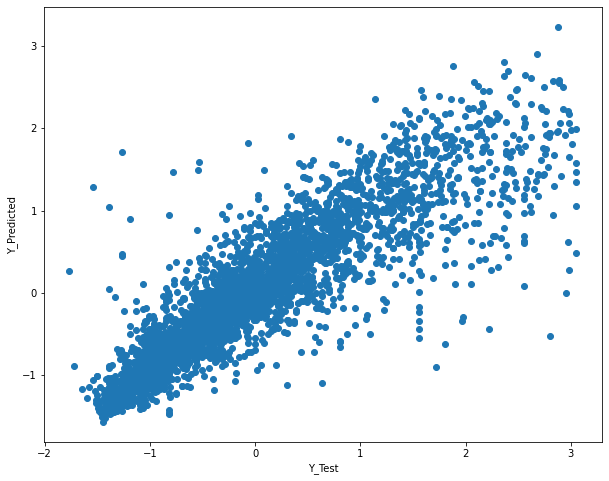

In [98]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,gbr1.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

### Support Vector Regression

In [99]:
from sklearn.svm import SVR
from sklearn.svm import SVC
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

SVR()

In [100]:
train_predict = regressor.predict(x_train_scaled.iloc[:,1:])
print("Train R2: ", r2_score(train_predict,y_train_scaled))
test_predict = regressor.predict(x_test_scaled)
print("Test R2: ",r2_score(y_test_scaled, test_predict))

Train R2:  0.6241991123288138
Test R2:  0.728205429046479


In [101]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
parameter_list = {'C':[0.1,1,10,100],
                  'gamma':[1,0.1,0.01,0.001],
                  'kernel':['rbf','poly','sigmoid','linear'],
                 'verbose':[1]}

SVR_1 = HalvingGridSearchCV(SVR(),
                            parameter_list,
                            cv = 10,
                            scoring = 'r2',
                           n_jobs = -1,
                           verbose = 5)

SVR_1.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 524
max_resources_: 14157
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 64
n_resources: 524
Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [103]:
SVR_1.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'verbose': 1}

In [104]:
SVR_1.best_score_

0.7381313688791419

In [1]:
svrf = SVR(C = 10,gamma = 0.1 , kernel = 'rbf', verbose = 1)
svrf.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

NameError: name 'SVR' is not defined

In [111]:
y_train_pred = svrf.predict(x_train_scaled.iloc[:,1:])
print("Train r2 Score: ",r2_score(y_train_pred,y_train_scaled))
y_test_pred = svrf.predict(x_test_scaled)
print("Test r2 Score: ",r2_score(y_test_pred,y_test_scaled))

Train r2 Score:  0.31017636241603996
Test r2 Score:  0.32759869699062594


In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [202]:
simple_nn = Sequential()
simple_nn.add(InputLayer(x_train_scaled.iloc[:,1:].shape[1],))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

Metal device set to: Apple M1 Pro


2022-07-17 11:35:31.872174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-17 11:35:31.872592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [203]:
opt = Adam()
cp = ModelCheckpoint('models/simple_nn',save_best_only = True)

In [204]:
simple_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
simple_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)

Epoch 1/100


2022-07-17 11:38:29.005277: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-17 11:38:29.223478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 0.7896 - root_mean_squared_error: 0.8886

2022-07-17 11:38:33.321435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-17 11:38:33.710140: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/simple_nn/assets
443/443 [==============================] - 5s 6ms/step - loss: 0.7896 - root_mean_squared_error: 0.8886 - val_loss: 0.5931 - val_root_mean_squared_error: 0.7701
Epoch 2/100
443/443 [==============================] - 3s 6ms/step - loss: 0.5261 - root_mean_squared_error: 0.7254 - val_loss: 0.4774 - val_root_mean_squared_error: 0.6909
Epoch 3/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4601 - root_mean_squared_error: 0.6783 - val_loss: 0.4346 - val_root_mean_squared_error: 0.6592
Epoch 4/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4293 - root_mean_squared_error: 0.6552 - val_loss: 0.4090 - val_root_mean_squared_error: 0.6395
Epoch 5/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4076 - root_mean_squared_error: 0.6385 - val_loss: 0.3903 - val_root_mean_squared_error: 0.6247
Epoch 6/100
443/443 [==============================] - 3s 6ms/step - loss: 0.3926 - root

Epoch 29/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3552 - root_mean_squared_error: 0.5960 - val_loss: 0.3546 - val_root_mean_squared_error: 0.5955
Epoch 30/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3548 - root_mean_squared_error: 0.5956 - val_loss: 0.3544 - val_root_mean_squared_error: 0.5953
Epoch 31/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3546 - root_mean_squared_error: 0.5955 - val_loss: 0.3529 - val_root_mean_squared_error: 0.5941
Epoch 32/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3541 - root_mean_squared_error: 0.5951 - val_loss: 0.3531 - val_root_mean_squared_error: 0.5942
Epoch 33/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3544 - root_mean_squared_error: 0.5953 - val_loss: 0.3534 - val_root_mean_squared_error: 0.5945
Epoch 34/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3542 - root_mean_squared_error: 0.5952 - val_loss: 0

Epoch 70/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.3517 - val_root_mean_squared_error: 0.5930
Epoch 71/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.3513 - val_root_mean_squared_error: 0.5927
Epoch 72/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3523 - root_mean_squared_error: 0.5936 - val_loss: 0.3515 - val_root_mean_squared_error: 0.5929
Epoch 73/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0.3521 - val_root_mean_squared_error: 0.5934
Epoch 74/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3523 - root_mean_squared_error: 0.5935 - val_loss: 0.3521 - val_root_mean_squared_error: 0.5934
Epoch 75/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0

In [213]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
print(mse(medium_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(medium_nn.predict(x_test_scaled),y_test_scaled))

2022-07-17 12:00:24.359862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.4003097908807233
0.3931024149630959


In [208]:
print("R2 Score",round(r2_score(y_test_scaled,medium_nn.predict(x_test_scaled)),3))

R2 Score 0.649


2022-07-17 12:01:06.345069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


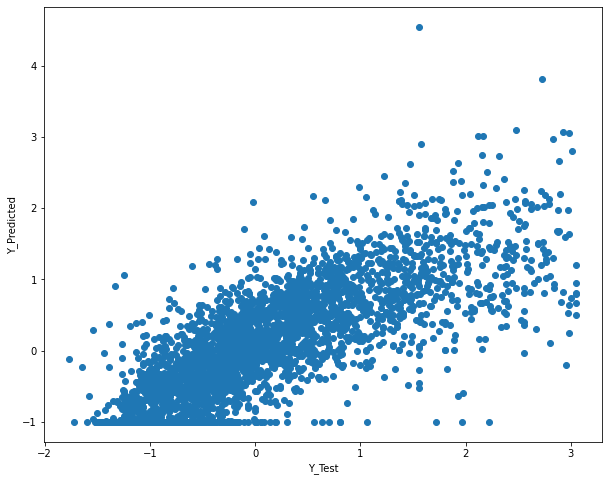

In [215]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,simple_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [212]:
medium_nn = Sequential()
medium_nn.add(InputLayer((x_train_scaled.iloc[:,1:].shape[1],)))
medium_nn.add(Dense(32,'relu'))
medium_nn.add(Dense(16,'relu'))
medium_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.1)
cp = ModelCheckpoint('models/medium_nn',save_best_only = True)
medium_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
medium_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)


Epoch 1/100


2022-07-17 11:54:46.850920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 0.4765 - root_mean_squared_error: 0.6903

2022-07-17 11:54:50.296349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: models/medium_nn/assets
443/443 [==============================] - 4s 8ms/step - loss: 0.4765 - root_mean_squared_error: 0.6903 - val_loss: 0.4334 - val_root_mean_squared_error: 0.6583
Epoch 2/100
443/443 [==============================] - 3s 7ms/step - loss: 0.4143 - root_mean_squared_error: 0.6436 - val_loss: 0.3372 - val_root_mean_squared_error: 0.5807
Epoch 3/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3733 - root_mean_squared_error: 0.6110 - val_loss: 0.3926 - val_root_mean_squared_error: 0.6266
Epoch 4/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3812 - root_mean_squared_error: 0.6174 - val_loss: 0.4501 - val_root_mean_squared_error: 0.6709
Epoch 5/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3862 - root_mean_squared_error: 0.6214 - val_loss: 0.3477 - val_root_mean_squared_error: 0.5897
Epoch 6/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3907 - root

Epoch 47/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4111 - root_mean_squared_error: 0.6411 - val_loss: 0.3798 - val_root_mean_squared_error: 0.6163
Epoch 48/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4031 - root_mean_squared_error: 0.6349 - val_loss: 0.3721 - val_root_mean_squared_error: 0.6100
Epoch 49/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4124 - root_mean_squared_error: 0.6422 - val_loss: 0.3776 - val_root_mean_squared_error: 0.6145
Epoch 50/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4182 - root_mean_squared_error: 0.6467 - val_loss: 0.3784 - val_root_mean_squared_error: 0.6152
Epoch 51/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3994 - root_mean_squared_error: 0.6320 - val_loss: 0.3920 - val_root_mean_squared_error: 0.6261
Epoch 52/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4100 - root_mean_squared_error: 0.6403 - val_loss: 0

In [214]:
medium_nn = load_model('models/medium_nn')
print(mse(medium_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(medium_nn.predict(x_test_scaled),y_test_scaled))

2022-07-17 12:00:29.600197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.3369767979908277
0.3371900933647524


In [216]:
print("R2 Score",round(r2_score(y_test_scaled,medium_nn.predict(x_test_scaled)),3))

R2 Score 0.663


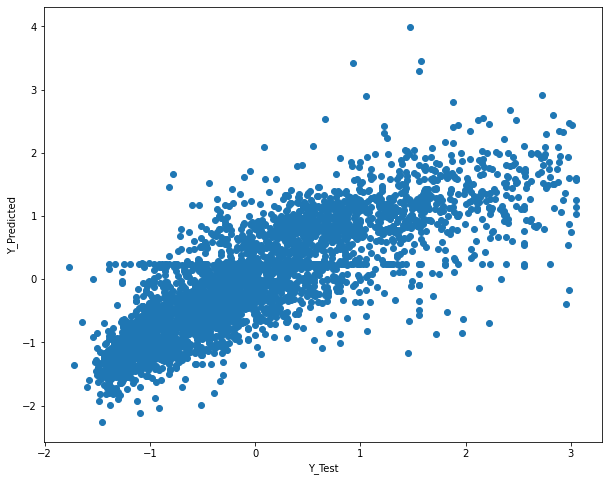

In [217]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,medium_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [220]:
y_train_scaled.value_counts()

median_house_value
-0.557943             94
-0.300555             93
-0.815330             79
-0.043167             68
 0.342914             67
                      ..
 1.609262              1
 0.422190              1
 1.615439              1
 1.616469              1
 0.325412              1
Length: 3564, dtype: int64

In [227]:
large_nn = Sequential()
large_nn.add(InputLayer((x_train_scaled.iloc[:,1:].shape[1],)))
large_nn.add(Dense(256,'relu'))
large_nn.add(Dense(128,'relu'))
large_nn.add(Dense(64,'relu'))
large_nn.add(Dense(32,'relu'))
large_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.1)
cp = ModelCheckpoint('models/large_nn',save_best_only = True)
large_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
large_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)

Epoch 1/100
  9/443 [..............................] - ETA: 2s - loss: 774.7141 - root_mean_squared_error: 27.8337

2022-07-17 13:11:44.023158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 17.2999 - root_mean_squared_error: 4.1593

2022-07-17 13:11:46.822371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: models/large_nn/assets
443/443 [==============================] - 4s 8ms/step - loss: 17.2999 - root_mean_squared_error: 4.1593 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040
Epoch 2/100
443/443 [==============================] - 4s 8ms/step - loss: 0.4700 - root_mean_squared_error: 0.6856 - val_loss: 0.4038 - val_root_mean_squared_error: 0.6355
Epoch 3/100
443/443 [==============================] - 3s 8ms/step - loss: 0.3838 - root_mean_squared_error: 0.6195 - val_loss: 0.3454 - val_root_mean_squared_error: 0.5877
Epoch 4/100
443/443 [==============================] - 3s 7ms/step - loss: 0.3480 - root_mean_squared_error: 0.5899 - val_loss: 0.3936 - val_root_mean_squared_error: 0.6273
Epoch 5/100
443/443 [==============================] - 3s 7ms/step - loss: 0.3552 - root_mean_squared_error: 0.5960 - val_loss: 0.3579 - val_root_mean_squared_error: 0.5983
Epoch 6/100
443/443 [==============================] - 3s 8ms/step - loss: 0.3439 - root

443/443 [==============================] - 3s 7ms/step - loss: 1.0083 - root_mean_squared_error: 1.0041 - val_loss: 1.0194 - val_root_mean_squared_error: 1.0096
Epoch 93/100
443/443 [==============================] - 3s 7ms/step - loss: 1.0088 - root_mean_squared_error: 1.0044 - val_loss: 1.0043 - val_root_mean_squared_error: 1.0022
Epoch 94/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0069 - root_mean_squared_error: 1.0034 - val_loss: 1.0053 - val_root_mean_squared_error: 1.0027
Epoch 95/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0103 - root_mean_squared_error: 1.0051 - val_loss: 1.0070 - val_root_mean_squared_error: 1.0035
Epoch 96/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0046 - root_mean_squared_error: 1.0023 - val_loss: 1.0102 - val_root_mean_squared_error: 1.0051
Epoch 97/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0068 - root_mean_squared_error: 1.0034 - val_loss: 1.0048 - val_r

2022-07-17 13:17:43.351588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.32236815883972236
0.3239340758690869
R2 Score 0.676


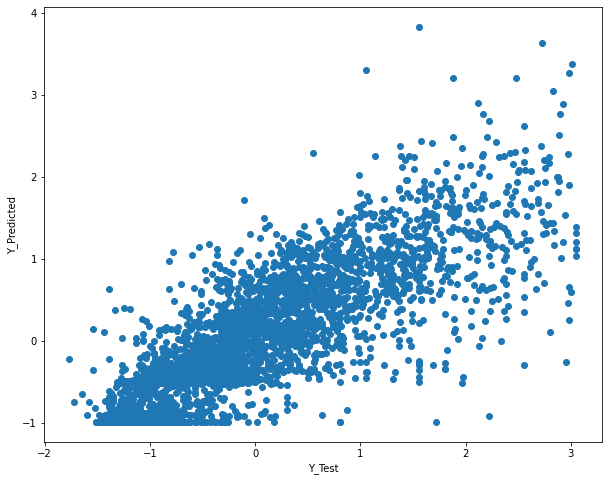

In [228]:
large_nn = load_model('models/large_nn')
print(mse(large_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(large_nn.predict(x_test_scaled),y_test_scaled))
print("R2 Score",round(r2_score(y_test_scaled,large_nn.predict(x_test_scaled)),3))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,large_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()